In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('churn_data.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df_agg = df.groupby("Churn")["customerID"].count().reset_index()
df_agg

,Churn,customerID
0,No,5163
1,Yes,1869


<Axes: xlabel='Churn', ylabel='customerID'>

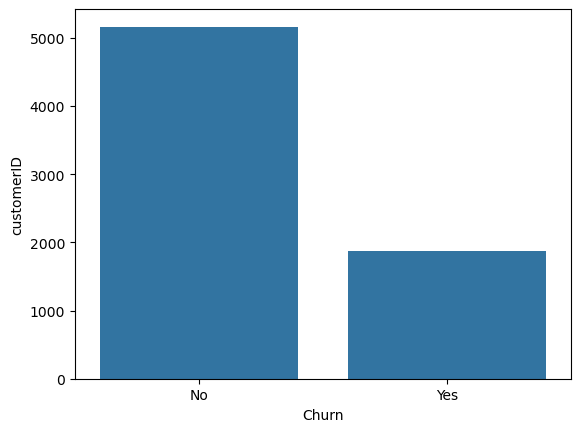

In [8]:
sns.barplot(data=df_agg, x='Churn', y='customerID')


In [10]:
df_payments = df.groupby("PaymentMethod")['customerID'].count().reset_index()
df_payments

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


<Axes: xlabel='PaymentMethod', ylabel='customerID'>

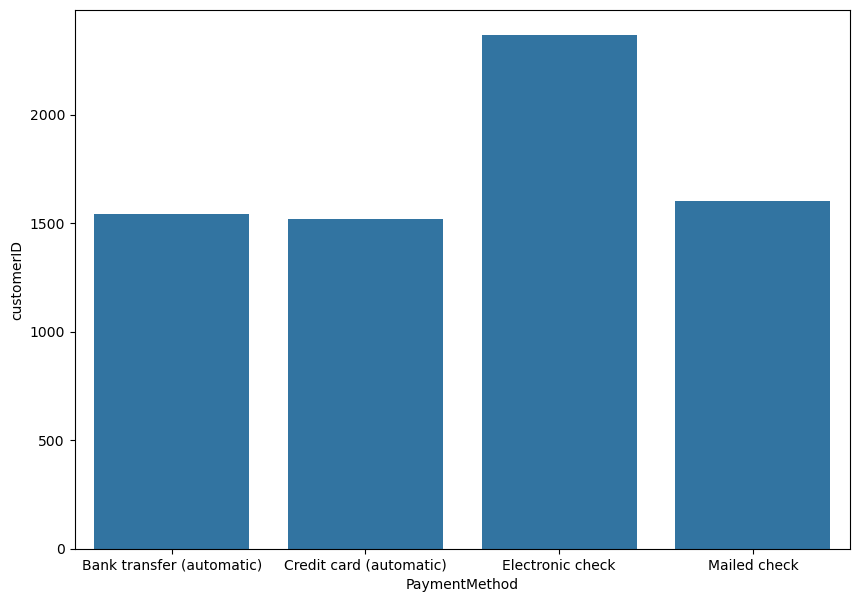

In [14]:
plt.figure(figsize=[10,7])

sns.barplot(df_payments, x='PaymentMethod', y='customerID')

In [16]:
df_gender = df.groupby('gender')['customerID'].count().reset_index()
df_gender

,gender,customerID
0,Female,3483
1,Male,3549


In [17]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
# Separando a base em X e Y

X = df.drop(columns=['customerID', 'Churn'], axis=1)
y = df[['Churn']]

In [20]:
# Fazer a transformação do Churn para 0 e 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

C:\Users\gabyp\AppData\Local\Temp\ipykernel_89632\3531512742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = le.transform(y.Churn)


In [22]:
X = pd.get_dummies(X, dtype=int)

In [23]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [24]:
X = pd.DataFrame(mm.fit_transform(X))

In [25]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
lr = model.fit(X_train, y_train)

c:\Users\gabyp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
lr.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0])

In [31]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3881,0.0,0.000000,0.615920,0.007079,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1
3867,0.0,0.112676,0.253731,0.044646,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2851,0.0,0.000000,0.317413,0.003618,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
2102,0.0,0.450704,0.747264,0.354627,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5651,0.0,0.605634,0.590050,0.398373,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,1.0,0.478873,0.544776,0.282997,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1532,0.0,1.000000,0.603980,0.659053,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
927,0.0,0.408451,0.678607,0.290705,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
1707,0.0,0.394366,0.368159,0.184791,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0


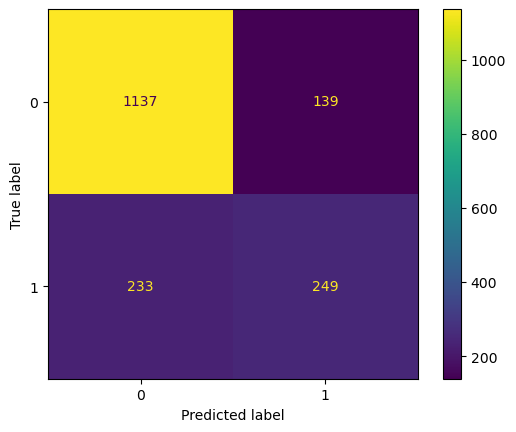

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

In [38]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [45]:
print(f'Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}')

print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}')

print(f'Precision Score (Treino): {precision_score(y_train, lr.predict(X_train))}')
print(f'Precision Score(Teste): {precision_score(y_test, lr.predict(X_test))}')

print(f'Recall (Treino): {recall_score(y_train, lr.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, lr.predict(X_test))}')

print(f'F1 Score (Treino): {f1_score(y_train, lr.predict(X_train))}')
print(f'F1 Score(Teste): {f1_score(y_test, lr.predict(X_test))}')

print(f'ROC AUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}')
print(f'ROC AUC(Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')


Acurácia (Treino): 0.8113386423966629
Acurácia (Teste): 0.78839590443686
Acurácia Balanceada (Treino): 0.7308087390927813
Acurácia Balanceada (Teste): 0.7038316705472236
Precision Score (Treino): 0.6683848797250859
Precision Score(Teste): 0.6417525773195877
Recall (Treino): 0.5609228550829127
Recall (Teste): 0.516597510373444
F1 Score (Treino): 0.6099568796550372
F1 Score(Teste): 0.5724137931034483
ROC AUC (Treino): 0.8508943812671933
ROC AUC(Teste): 0.8339598589992065


In [46]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [47]:
rf.fit(X_train, y_train)
rf.predict(X_test)

c:\Users\gabyp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([1, 0, 1, ..., 0, 0, 0])

In [49]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3881,0.0,0.000000,0.615920,0.007079,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1
3867,0.0,0.112676,0.253731,0.044646,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2851,0.0,0.000000,0.317413,0.003618,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
2102,0.0,0.450704,0.747264,0.354627,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
5651,0.0,0.605634,0.590050,0.398373,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,1.0,0.478873,0.544776,0.282997,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1532,0.0,1.000000,0.603980,0.659053,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
927,0.0,0.408451,0.678607,0.290705,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
1707,0.0,0.394366,0.368159,0.184791,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0


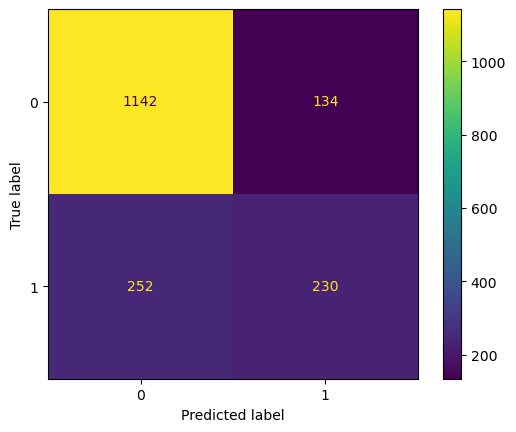

In [50]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [51]:
print(f'Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}')

print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}')

print(f'Precision Score (Treino): {precision_score(y_train, rf.predict(X_train))}')
print(f'Precision Score(Teste): {precision_score(y_test, rf.predict(X_test))}')

print(f'Recall (Treino): {recall_score(y_train, rf.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf.predict(X_test))}')

print(f'F1 Score (Treino): {f1_score(y_train, rf.predict(X_train))}')
print(f'F1 Score(Teste): {f1_score(y_test, rf.predict(X_test))}')

print(f'ROC AUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}')
print(f'ROC AUC(Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}')

Acurácia (Treino): 0.9981039059537353
Acurácia (Teste): 0.7804323094425484
Acurácia Balanceada (Treino): 0.997090666408966
Acurácia Balanceada (Teste): 0.6860813746276616
Precision Score (Treino): 0.9978308026030369
Precision Score(Teste): 0.6318681318681318
Recall (Treino): 0.9949531362653208
Recall (Teste): 0.47717842323651455
F1 Score (Treino): 0.9963898916967509
F1 Score(Teste): 0.5437352245862884
ROC AUC (Treino): 0.9998737773982341
ROC AUC(Teste): 0.8132910157520259


In [52]:
# pelas metricas tem um overfitting pois cai muito na base de teste, por isso vamos fazer um GridSearch

from sklearn.model_selection import GridSearchCV

In [53]:
parameters = {"max_depth": [1,2,3,4,5,6,7,8,9,10],
              "n_estimators": [100,300,500]}

In [59]:
grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=1)

In [60]:
grid_search.fit(X_train, y_train)

c:\Users\gabyp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gabyp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gabyp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gabyp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [63]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
dict = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
rf_tunned = RandomForestClassifier(bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 9,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 monotonic_cst = None,
 n_estimators = 300,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False)

rf_tunned

RandomForestClassifier(max_depth=9, n_estimators=300)

In [69]:
rf_tunned.fit(X_train, y_train)

c:\Users\gabyp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=9, n_estimators=300)

In [70]:
rf_tunned.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0])

In [71]:
X_test.assign(churn=y_test).assign(label=rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3881,0.0,0.000000,0.615920,0.007079,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1
3867,0.0,0.112676,0.253731,0.044646,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2851,0.0,0.000000,0.317413,0.003618,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
2102,0.0,0.450704,0.747264,0.354627,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
5651,0.0,0.605634,0.590050,0.398373,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,1.0,0.478873,0.544776,0.282997,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1532,0.0,1.000000,0.603980,0.659053,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
927,0.0,0.408451,0.678607,0.290705,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
1707,0.0,0.394366,0.368159,0.184791,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0


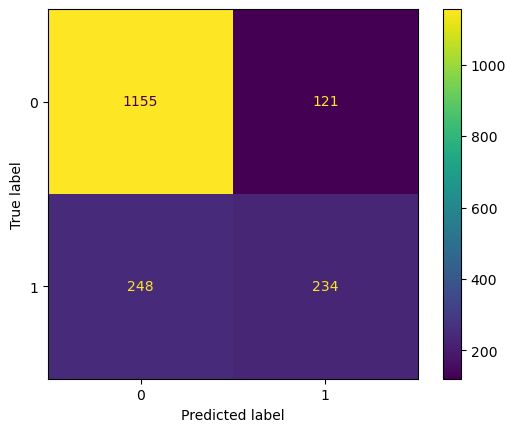

In [72]:
ConfusionMatrixDisplay.from_estimator(rf_tunned, X_test, y_test)

In [73]:
print(f'Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}')

print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}')

print(f'Precision Score (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}')
print(f'Precision Score(Teste): {precision_score(y_test, rf_tunned.predict(X_test))}')

print(f'Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}')

print(f'F1 Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}')
print(f'F1 Score(Teste): {f1_score(y_test, rf_tunned.predict(X_test))}')

print(f'ROC AUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}')
print(f'ROC AUC(Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}')

Acurácia (Treino): 0.8528631020098597
Acurácia (Teste): 0.7901023890784983
Acurácia Balanceada (Treino): 0.7777599299905087
Acurácia Balanceada (Teste): 0.69532479610817
Precision Score (Treino): 0.7759710930442638
Precision Score(Teste): 0.6591549295774648
Recall (Treino): 0.619322278298486
Recall (Teste): 0.4854771784232365
F1 Score (Treino): 0.6888532477947072
F1 Score(Teste): 0.5591397849462365
ROC AUC (Treino): 0.9344962197211825
ROC AUC(Teste): 0.8342118784063268
